**Arquivo de entrada disponível em:** https://github.com/silvioedu/IGTI-MachileLearningBootcamp/blob/main/modulo_2/desafio/winequality-red.csv

# Configurações

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
sns.set()

In [121]:
filename = 'winequality-red.csv'
df = pd.read_csv(filename, sep=';')

In [122]:
def plot_feature(df, feature):
  """ Plotar boxplot e distplot
  ----------------------------
  df     : dataframe
  feature: variável disponível
  """  
  fig, axes = plt.subplots(1,2, figsize=(18,5))
  plt.suptitle(f"Feature '{feature}'")

  sns.boxplot(df[feature],ax = axes[0])
  sns.distplot(df[feature], kde=False, ax = axes[1])
  plt.xlabel("")

def treinar_modelos(x_train, y_train, x_test, y_test, columns):

  rfc = RandomForestClassifier(max_depth=10, random_state=0)
  rfc.fit(x_train, y_train)

  knc = KNeighborsClassifier(n_neighbors=5)
  knc.fit(x_train, y_train)

  dtc = DecisionTreeClassifier()
  dtc.fit(x_train, y_train)

  svm = SVC(gamma='auto', kernel='rbf')
  svm.fit(x_train, y_train)

  print('-> Score')
  print(f'RandomForestClassifier : {np.round(rfc.score(x_test, y_test),3)}')
  print(f'KNeighborsClassifier   : {np.round(knc.score(x_test, y_test),3)}')
  print(f'DecisionTreeClassifier : {np.round(dtc.score(x_test, y_test),3)}')
  print(f'SVC                    : {np.round(svm.score(x_test, y_test),3)}')
  print()
  print('-> Importance')
  imp = pd.DataFrame({'feature': columns,
                      'importance': rfc.feature_importances_})
  print(imp)


# Análise exploratória

## Geral

In [123]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [125]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Por feature

quality

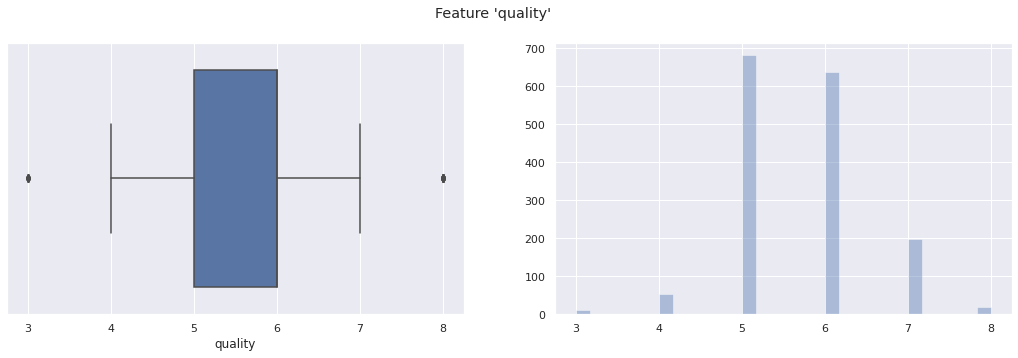

In [127]:
plot_feature(df, 'quality')

In [128]:
df.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

### Avaliando a correlação entre as features

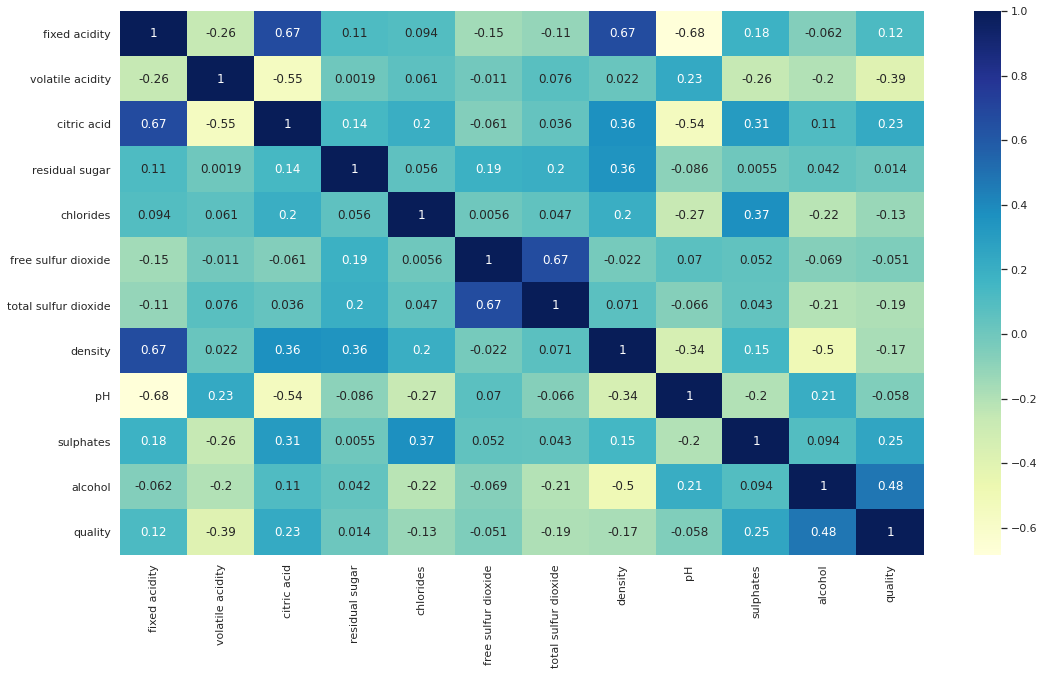

In [129]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

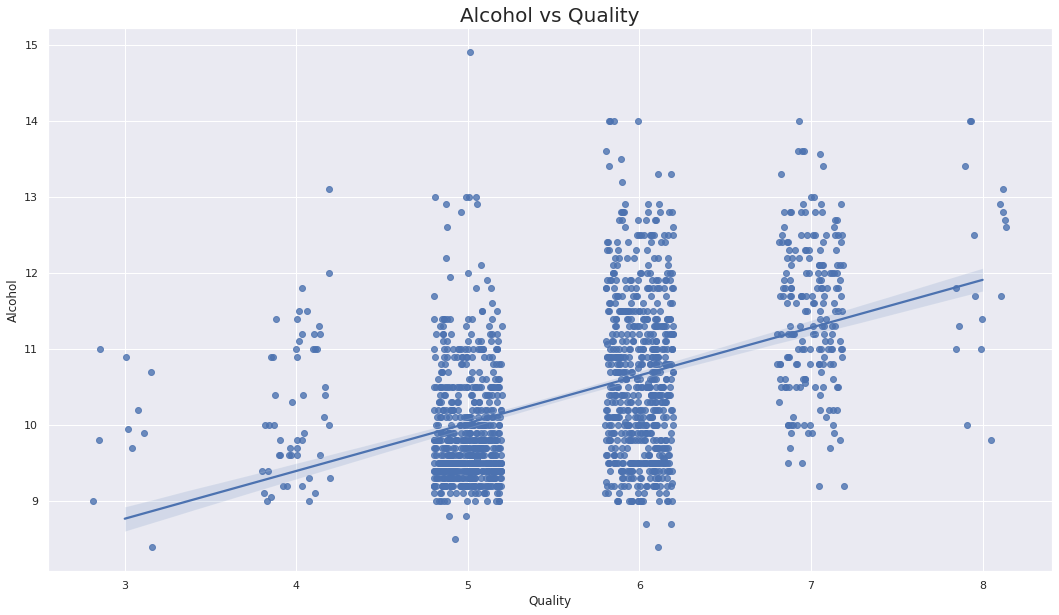

In [130]:
plt.figure(figsize=(18, 10))
sns.regplot(y='alcohol', x='quality', data=df, color='b', x_jitter=0.2)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Alcohol vs Quality', fontsize=20)
plt.show();

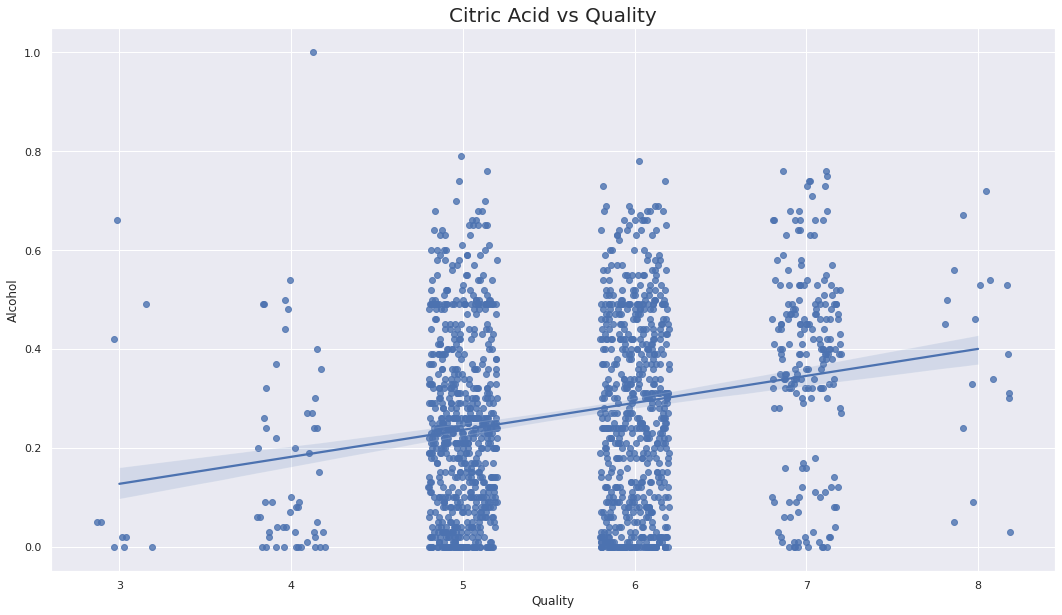

In [131]:
plt.figure(figsize=(18, 10))
sns.regplot(y='citric acid', x='quality', data=df, color='b', x_jitter=0.2)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Citric Acid vs Quality', fontsize=20)
plt.show();

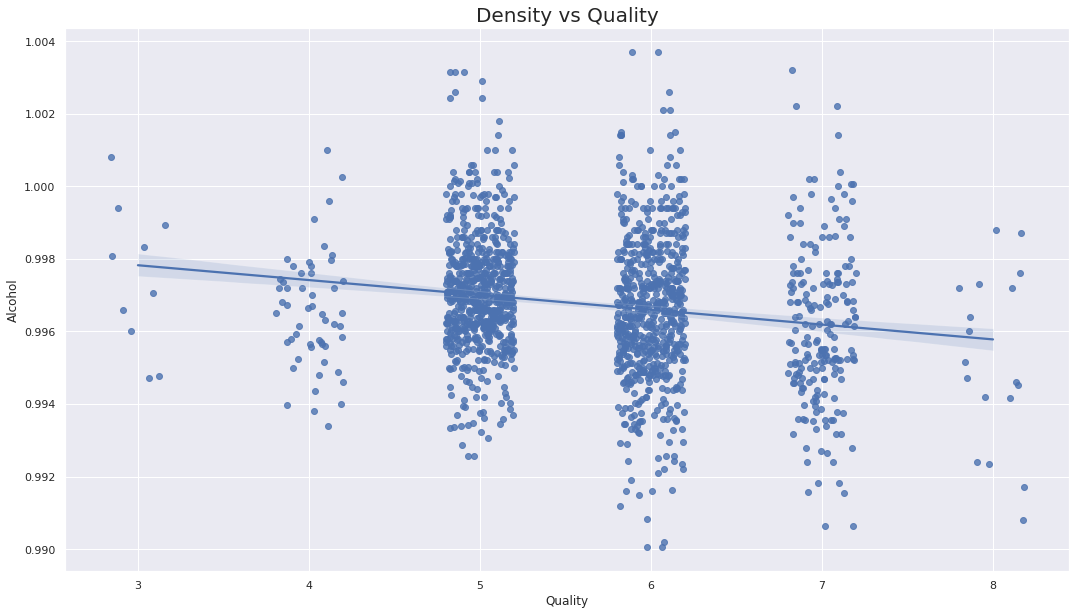

In [132]:
plt.figure(figsize=(18, 10))
sns.regplot(y='density', x='quality', data=df, color='b', x_jitter=0.2)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Density vs Quality', fontsize=20)
plt.show();

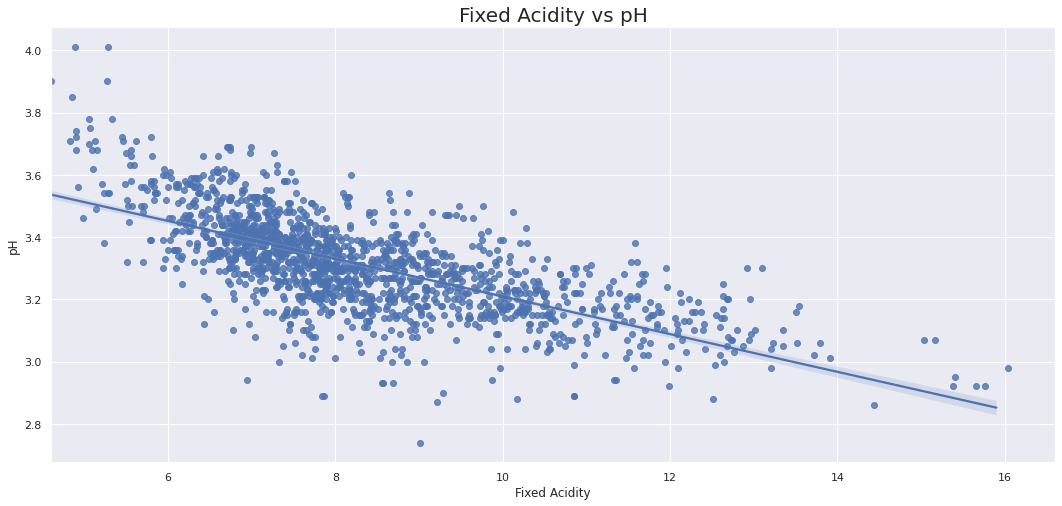

In [133]:
plt.figure(figsize=(18, 8))
sns.regplot(x='fixed acidity', y='pH', data=df, color='b', x_jitter=0.2)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH', fontsize=20)
plt.show();

# Realizando o treinamento dos modelos

In [134]:
feature_train = [c for c in df.columns if c != 'quality']
feature_train

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [135]:
y = df['quality']
x = df[feature_train]

In [136]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')

x_train: (1119, 11)
x_test: (480, 11)


In [138]:
treinar_modelos(x_train, y_train, x_test, y_test, feature_train)

-> Score
RandomForestClassifier : 0.665
KNeighborsClassifier   : 0.562
DecisionTreeClassifier : 0.592
SVC                    : 0.608

-> Importance
                 feature  importance
0          fixed acidity    0.076036
1       volatile acidity    0.108600
2            citric acid    0.074178
3         residual sugar    0.068283
4              chlorides    0.073659
5    free sulfur dioxide    0.062793
6   total sulfur dioxide    0.103660
7                density    0.081406
8                     pH    0.069145
9              sulphates    0.121037
10               alcohol    0.161204


### Fazendo teste com a feature target sendo binária

In [139]:
df.quality[df.quality <= 5] = 0 # ruim
df.quality[df.quality > 5] = 1 # bom
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [140]:
y = df['quality']
x = df[feature_train]

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')

x_train: (1119, 11)
x_test: (480, 11)


In [141]:
treinar_modelos(x_train, y_train, x_test, y_test, feature_train)

-> Score
RandomForestClassifier : 0.775
KNeighborsClassifier   : 0.683
DecisionTreeClassifier : 0.733
SVC                    : 0.731

-> Importance
                 feature  importance
0          fixed acidity    0.061597
1       volatile acidity    0.113581
2            citric acid    0.061284
3         residual sugar    0.052117
4              chlorides    0.066866
5    free sulfur dioxide    0.057618
6   total sulfur dioxide    0.100398
7                density    0.082411
8                     pH    0.065198
9              sulphates    0.147237
10               alcohol    0.191694


### Fazendo teste apenas com as features mais importantes

In [142]:
feature_train = ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'density']

In [143]:
y = df['quality']
x = df[feature_train]

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')

x_train: (1119, 5)
x_test: (480, 5)


In [144]:
treinar_modelos(x_train, y_train, x_test, y_test, feature_train)

-> Score
RandomForestClassifier : 0.779
KNeighborsClassifier   : 0.723
DecisionTreeClassifier : 0.765
SVC                    : 0.738

-> Importance
                feature  importance
0               alcohol    0.268051
1             sulphates    0.210348
2      volatile acidity    0.194992
3  total sulfur dioxide    0.177590
4               density    0.149020
